In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
from salishsea_tools import evaltools as et, geo_tools, places
#warnings.filterwarnings('ignore')

%matplotlib inline

##### Note:
I believe the issue with the 2007-Sep 2011 winds is that they were read into NEMO using the wrong weights file (one that supposed the wind values were on a different grid than they actually were. Specifically, pre-2011 winds were read in using post-2011 weights. 
I propose we therefore extract wind from the pre-to-2011 files as if it were on the post-2011 grid. 

In [2]:
fgood=xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2012m03d01.nc')

In [3]:
fbad=xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2008m03d01.nc')

In [4]:
print("the grid is displaced by aproximately ",
      np.max(np.abs(fgood.variables['nav_lat'][:,:]-fbad.variables['nav_lat'][:,:]))*111,
      "km \n meridionally, and a similar amount in zonally")

the grid is displaced by aproximately  <xarray.Variable ()>
array(10.29488754) km 
 meridionally, and a similar amount in zonally


In [5]:
with xr.open_dataset('/data/eolson/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    tmask=mesh.variables['tmask'][0,0,:,:]
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]

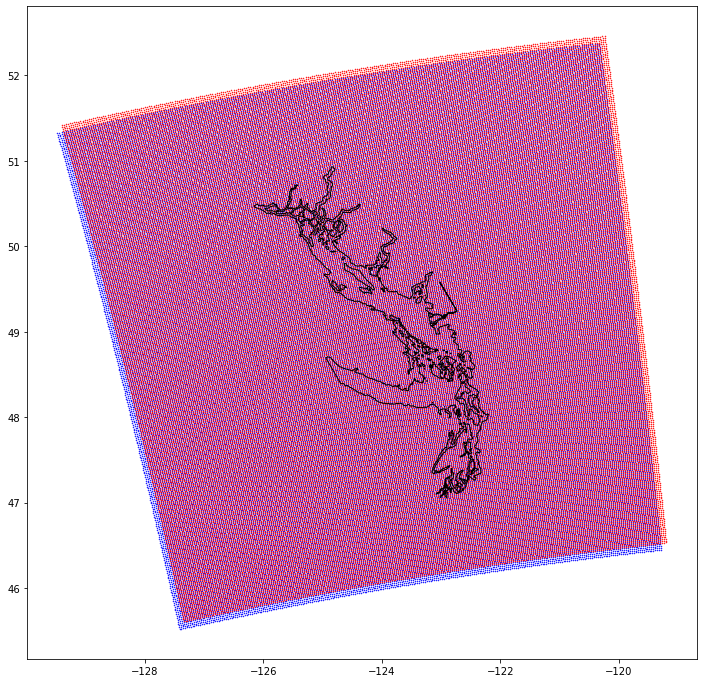

In [6]:
fig,ax=plt.subplots(1,1,figsize=(12,12))
ax.plot(fgood.variables['nav_lon'][:,:]-360,fgood.variables['nav_lat'][:,:],'b.',ms=1,zorder=1);
ax.plot(fbad.variables['nav_lon'][:,:]-360,fbad.variables['nav_lat'][:,:],'r.',ms=1,zorder=1);
ax.contour(navlon,navlat,tmask,[.5,],zorder=2,linewidths=1,colors='k')
#ax.set_xlim(-126.4,-122)
#ax.set_ylim(47,51)

In [7]:
fgood.close()
fbad.close()

## Example getting 201905 pre- Sept 2014 wind indices
This will be correct for September 2011 on, but I believe should reflect the incorrect forcing the model saw pre-Sep 2011

Note: pull changes to evaltools in salishsea_tools first

In [8]:
gridrefWind=xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2012m03d01.nc')
# always use a post-2011 file here to identify station grid location


lon,lat=places.PLACES['S3']['lon lat']
jW,iW=geo_tools.find_closest_model_point(lon,lat,
                    gridrefWind.variables['nav_lon'][:,:]-360,gridrefWind.variables['nav_lat'][:,:],
                    grid='GEM2.5')
# the -360 is needed because longitudes in this case are reported in postive degrees East

gridrefWind.close()
jW,iW

(135, 145)

In [11]:
start=dt.datetime(2012,1,1)
end=dt.datetime(2012,3,31)

Then proceed as normal, but with the following adjustments:

In [12]:
opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
flist2=et.index_model_files(start,end,opsdir,nam_fmt='gemlam',flen=1,ftype='None',tres=24)

In [1]:
def getWindVarsYear(year):
    if year>2014:
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jW=
        iW=
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jW=135
        iW=145
    return jW,iW,opsdir,nam_fmt

In [ ]:
jW,iW,opsdir,nam_fmt=getWindVarsYear(2015)
flist2=et.index_model_files(start,end,opsdir,nam_fmt,flen=1,ftype='None',tres=24)